# Q1 - VALID ANAGRAM 


Given two strings s and t, return true if t is an anagram of s, and false otherwise.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

 

Example 1:

Input: s = "anagram", t = "nagaram"
Output: true
Example 2:

Input: s = "rat", t = "car"
Output: false

In [1]:
def isAnagram(s, t):
    n = len(s)
    r = len(t)
    
    if n != r :
        return False 
   
    dict1 , dict2 = {} , {}
    for i in range(n):
        dict1[s[i]] = 1 + get(s[i] , 0) #new method .get() - does not pull out error in case the value is absent in the dict
        dict2[t[i]] = 1 + get(t[i] , 0)
        
    for i in dict1:
        if dict1[i] != dict2.get(i , 0):
            return False
    return True 

 

In [12]:
def isAnagram(s, t):
    n = len(s)
    r = len(t)
    
    if n != r :
        return False 
   
    dict1 , dict2 = {} , {}
    for i in range(n):
        if s[i] in dict1:
            dict1[s[i]] += 1
        else:
            dict1[s[i]] = 1
            
    for i in range(r):
        if t[i] in dict2:
            dict2[t[i]] += 1
        else:
            dict2[t[i]] = 1
            
    for i in dict1:
         if i not in dict2:
            return False
         else:
            if dict1[i] != dict2[i]:
                return False
    return True 

In [15]:
s = "anagram" 
t = "nagaram"
isAnagram(s,t) 

True

##### sorted method

In [4]:
def isAnagram1(s: str, t: str):
    if sorted(s) == sorted(t):
        return True 

# Q2 - TWO SUM

we need to find the pair of the two elements from the given list whose sum is equal to the given target value. 

In [5]:
def twoSum(nums, target):
    prevMap = {} #storing the value and index 
    
    for i , n in enumerate(nums): #taking the value and num from nums 
        difference = target - n   
        if difference in prevMap:
            return [prevMap[difference] , i]  #returning the index of n from dict and the i 
        prevMap[n] = i                        #updating the value of n in dic with index
    
twoSum([2,11,15,7] , 9)        

[0, 3]

# Q3 - MAXIMUM SUBARRAY

Given an integer array nums, find the contiguous subarray (containing at least one number) which has the largest sum and return its sum.

A subarray is a contiguous part of an array.

 

Example 1:

Input: nums = [-2,1,-3,4,-1,2,1,-5,4]
Output: 6
Explanation: [4,-1,2,1] has the largest sum = 6.

In [6]:
nums = [-2,1,-3,4,-1,2,1,-5,4]
curr_sum = 0                      # created a current sum and max sum 
max_sum = nums[0]                  
    
for num in nums:                   #iterated through the array and checked the sum at each point 
    if curr_sum < 0:               # when the negative values came it converted curr sum to zero 
        curr_sum = 0
    curr_sum += num 
    max_sum = max(max_sum , curr_sum) # checked which is the max 
    
print(max_sum)

6


# Q4 - TWO SUM II

Given a 1-indexed array of integers numbers that is already sorted in non-decreasing order, find two numbers such that they add up to a specific target number. Let these two numbers be numbers[index1] and numbers[index2] where 1 <= index1 < index2 <= numbers.length.

Return the indices of the two numbers, index1 and index2, added by one as an integer array [index1, index2] of length 2.

The tests are generated such that there is exactly one solution. You may not use the same element twice.

Your solution must use only constant extra space.

 

Example 1:

Input: numbers = [2,7,11,15], target = 9
Output: [1,2]
Explanation: The sum of 2 and 7 is 9. Therefore, index1 = 1, index2 = 2. We return [1, 2].
Example 2:

Input: numbers = [2,3,4], target = 6
Output: [1,3]
Explanation: The sum of 2 and 4 is 6. Therefore index1 = 1, index2 = 3. We return [1, 3].

In [7]:
# GIVEN 1 INDEXED ARRAY 
# BRUT FORCE CAN BE ITERATE THROUGH EACH PAIR AND CHECK - O(N^2)
# TWO POINTER APPROACH - TWO POINTS AT TWO ENDS - 
# INCREASE THE LEFT POINTER IF SUM OF 2 POINTER < TARGET, LEFT SHIFT THE POINTER IF SUM OF POINTER > TARGET

def TWOSUM(numbers ,target):

    left_pointer = 0
    right_pointer = len(numbers) - 1

    while left_pointer < right_pointer :
        summ = numbers[left_pointer] + numbers[right_pointer]

        if summ > target :
            right_pointer -= 1
        elif summ < target :
            left_pointer += 1
        else:
            return (left_pointer +1 , right_pointer + 1)

# Q5 - HOUSE ROBBER

You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security systems connected and it will automatically contact the police if two adjacent houses were broken into on the same night.

Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police.

 

Example 1:

Input: nums = [1,2,3,1]
Output: 4
Explanation: Rob house 1 (money = 1) and then rob house 3 (money = 3).
Total amount you can rob = 1 + 3 = 4.
Example 2:

Input: nums = [2,7,9,3,1]
Output: 12
Explanation: Rob house 1 (money = 2), rob house 3 (money = 9) and rob house 5 (money = 1).
Total amount you can rob = 2 + 9 + 1 = 12.

##### explanation
- if the array is empty - noting to steal 
- if the array consist of only 1 element -  max t steal is that itself 
- if the array has 2 elements - max to steal is the max of a 2 elements 
- IMP - if arra has 3 elements - max steal is either the 2nd value or the sum of 1st + 3rd.

In [8]:
def rob(self, nums):
    if not nums:
        return 0
    if len(nums) <= 2:
        return max(nums)
    
    dp = [0] * len(nums)             #creating a new array to play with 
    
    dp[0] = nums[0]                  #putting the 1st value of nums as 1st in dp
    dp[1] = max(nums[0] , nums[1])   #putting the max of 1 and 2 in nums as 2nd in dp
    
    for i in range(2 , len(nums)):   # iterating nums from 3rd value till last 
        dp[i] = max(dp[i-1] , num[i] + dp[i-2]) # so third value should be max od 3rd plus 1st(num[i] + dp[i-2]) or second (dp[i-1]) 
        
    return dp[-1]  #returning the last element as it will be the largest 

In [9]:
def rob(self, nums): 
    prev = 0 
    curr = 0 
    for num in nums:
        temp = prev
        prev = curr
        curr = max(num + temp , prev )
    return curr 

# Q6 - COMMON ELEMENTS

In [10]:
from collections import Counter

A = [ 1,1,1,2,2,2,3,3,5,7 ]
B = [ 1,1,2,2,3,3,3,8,7 ]
res = []

freqA = Counter(A)
freqB = Counter(B)

# print(freqA,freqB)
    
commondict = freqA & freqB

for (key , val) in commondict.items():
    for i in range(0, val):
        res.append(key)
print(res)


[1, 1, 2, 2, 3, 3, 7]


In [11]:
freqA , freqB = {} , {}
for i in range(len(A)):
    if A[i] in freqA:
        freqA[A[i]] += 1
    else:
        freqA[A[i]] = 1

for i in range(len(B)):
    if B[i] in freqB:
        freqB[B[i]] += 1
    else:
        freqB[B[i]] = 1
        
print(freqA,freqB)
{1: 3, 2: 3, 3: 2, 5: 1, 7: 1} {1: 2, 2: 2, 3: 3, 8: 1, 7: 1}

SyntaxError: invalid syntax (Temp/ipykernel_20268/4131402242.py, line 15)

# Q7 - MERGE TWO LISTS

You are given the heads of two sorted linked lists list1 and list2.

Merge the two lists in a one sorted list. The list should be made by splicing together the nodes of the first two lists.

Return the head of the merged linked list.

Input: list1 = [1,2,4], list2 = [1,3,4]
Output: [1,1,2,3,4,4]

In [ ]:
def mergeTwoLists(l1, l2):
    dummy = ListNode()
    tail = dummy

    while l1 and l2 :
        if l1.val < l2.val :
            tail.next = l1
            l1 = l1.next

        else:
            tail.next = l2
            l2 = l2.next
            
        tail = tail.next
        
    if l1:
        tail.next = l1

    elif l2:
        tail.next = l2
        
    return dummy.next

# mergeTwoLists([1,2,4] , [1,3,4])   

# Q8 - BEST TIME TO BUY & SELL STOCK

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

 

Example 1:

Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.

In [ ]:
# 2 pointer approach 

def maxProfit(prices):    
    buy = 0
    sell = 1 
    max_profit = 0
    for stocks in prices:
        if prices[buy] > prices[sell]:
            buy = sell
            sell += 1
        if prices[buy] < prices[sell]:
            max_profit = max((prices[sell] - prices[buy]) , max_profit)
            sell += 1
        return max_profit
    
maxProfit([7,1,5,3,6,4])

# Q9 - MERGE SORTED ARRAY

You are given two integer arrays nums1 and nums2, sorted in non-decreasing order, and two integers m and n, representing the number of elements in nums1 and nums2 respectively.

Merge nums1 and nums2 into a single array sorted in non-decreasing order.

The final sorted array should not be returned by the function, but instead be stored inside the array nums1. To accommodate this, nums1 has a length of m + n, where the first m elements denote the elements that should be merged, and the last n elements are set to 0 and should be ignored. nums2 has a length of n.

 

Example 1:

Input: nums1 = [1,2,3,0,0,0], m = 3, nums2 = [2,5,6], n = 3
Output: [1,2,2,3,5,6]
Explanation: The arrays we are merging are [1,2,3] and [2,5,6].
The result of the merge is [1,2,2,3,5,6] with the underlined elements coming from nums1.

In [ ]:
def merge(nums1 ,nums2 , m , n):
    
    last = n + m - 1 # replacing the last value of element with the largest of both ends 
    while n > 0 and m > 0 :    #loop should run till this breaks 
        if nums1[m-1] > nums2[n-1]: #checking the last number from both array
            nums1[last] = nums1[m-1] #replacing the nums1 val to the last of nums 1 
            m -= 1 #decrementing the pointer 
        else:
            nums1[last] = nums2[n-1] #replacing the nums2 value with the last of nums1 
            n -= 1
        last -= 1 #decrementing the last pointer to fill the second last point 
        
    #edge condition : what if there are elements left in nums 2 even after checking with nums 1 
    while n > 0 :
        nums1[last] = nums2[n-1] #putting the remaining elements one by one 
        n -= 1
        last -= 1
    return nums1


In [ ]:
merge([1,2,3,0,0,0] ,[2,5,6] , 3 , 3)


# Q10 - CLIMBING STAIRS

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

 

Example 1:

Input: n = 2
Output: 2
Explanation: There are two ways to climb to the top.
1. 1 step + 1 step
2. 2 steps

Input: n = 3
Output: 3
Explanation: There are three ways to climb to the top.
1. 1 step + 1 step + 1 step
2. 1 step + 2 steps
3. 2 steps + 1 step

In [ ]:
# https://www.youtube.com/watch?v=Y0lT9Fck7qI&list=PLot-Xpze53lfQmTEztbgdp8ALEoydvnRQ&index=9
# explanation is simple fibinocci but watch the video for more understanding

def climbStairs( n ):
    one = 1
    two = 1 
    for i in range(n-1):
        temp = one 
        one = one + two 
        two = temp
    return one 


In [ ]:
climbStairs(7)

# Q11 - REVERSE LINK LIST

Given the head of a singly linked list, reverse the list, and return the reversed list.

 

Example 1:


Input: head = [1,2,3,4,5]
Output: [5,4,3,2,1]
Example 2:


Input: head = [1,2]
Output: [2,1]

In [ ]:
def reverseList(head):
    prev = None
    curr = head
    
    while curr :
        temp = currr.next
        curr.next = prev 
        prev = curr
        curr = temp
    return prev
        
        

In [ ]:
Recursive 

# Q12 - PEAK ELEMENT 

A peak element is an element that is strictly greater than its neighbors.

Given a 0-indexed integer array nums, find a peak element, and return its index. If the array contains multiple peaks, return the index to any of the peaks.

You may imagine that nums[-1] = nums[n] = -∞. In other words, an element is always considered to be strictly greater than a neighbor that is outside the array.

You must write an algorithm that runs in O(log n) time.

 

Example 1:

Input: nums = [1,2,3,1]
Output: 2
Explanation: 3 is a peak element and your function should return the index number 2.
Example 2:

Input: nums = [1,2,1,3,5,6,4]
Output: 5
Explanation: Your function can return either index number 1 where the peak element is 2, or index number 5 where the peak element is 6.

In [ ]:
arr = [1,2,1,3,5,6,4]    #linear time complexity 

for x in range(len(arr)):
    if (x == 0 or arr[x] > arr[x - 1]) and (x == len(arr)-1 or arr[x] > arr[x + 1]):
        print(x) 
    

In [ ]:
#time complexity (0logn)
nums = [1,2,1,3,5,6,4] 

l , r = 0 , len(nums) - 1

while l < r:
    mid = (l+r)//2

    if nums[mid] < nums[mid+1]:
        l = mid + 1
    else:
        r = mid
print(l)

# Q13 - DUPLICATE IN AN ARRAY

Given an integer array nums of length n where all the integers of nums are in the range [1, n] and each integer appears once or twice, return an array of all the integers that appears twice.

You must write an algorithm that runs in O(n) time and uses only constant extra space.

 

Example 1:

Input: nums = [4,3,2,7,8,2,3,1]
Output: [2,3]
Example 2:

Input: nums = [1,1,2]
Output: [1]
Example 3:

Input: nums = [1]
Output: []

In [ ]:
nums = [4,3,2,7,8,2,3,1]
dict1 = {}
res = []
for i in range(len(nums)):
    if nums[i] in dict1:
        dict1[nums[i]] += 1
        
    else:
        dict1[nums[i]] = 1
        
for (key,values) in dict1.items():
    if values > 1:
        res.append(key)
print(res)

In [ ]:
nums = [4,3,2,7,8,2,3,1]
output = []

for n in nums:
    m = abs(n)
    
    if nums[m-1] < 0 :     # can encounter list index out of range for values greater than n
        output.append(m)
    else:
        nums[m-1]*= -1
print(output)

# Q14 - COUNT PAIRS WITH GIVEN SUM

Given an array of N integers, and an integer K, find the number of pairs of elements in the array whose sum is equal to K.


Example 1:

Input:
N = 4, K = 6
arr[] = {1, 5, 7, 1}
Output: 2
Explanation: 
arr[0] + arr[1] = 1 + 5 = 6 
and arr[1] + arr[3] = 5 + 1 = 6.

Example 2:

Input:
N = 4, K = 2
arr[] = {1, 1, 1, 1}
Output: 6
Explanation: 
Each 1 will produce sum 2 with any 1.

In [ ]:
arr = [1, 5, 7, 1]
k = 6
n = len(arr)
freq_map = {}

# Store the frequency of each element
for i in range(n):
    if arr[i] in freq_map:
        freq_map[arr[i]] += 1
    else:
        freq_map[arr[i]] = 1
        
# Step 2
#go through each element in the dic created searching for the sum - each element in arr. add frq of found vals in counter 
#sice we are double counting certain elements in each position (# Exclude the pairs having same index) we have to subtract count
#finally return the counts but divide it by 2 since we double counted it. 
count = 0

# Count the number of valid pairs
for i in range(n):
    complement = k - arr[i]
    if complement in freq_map:
        count += freq_map[complement]

    # Exclude the pairs having same index
    if complement == arr[i]:
        count -= 1
print(count//2)

In [ ]:
arr = [1,1,1,1]
k = 2
n = len(arr)
freq_map = {}

# Store the frequency of each element
for i in range(n):
    if arr[i] in freq_map:
        freq_map[arr[i]] += 1
    else:
        freq_map[arr[i]] = 1
        
# Step 2

count = 0

# Count the number of valid pairs
for i in range(n):
    complement = k - arr[i]
    if complement in freq_map:
        count += freq_map[complement]

    # Exclude the pairs having same index
    if complement == arr[i]:
        count -= 1
print(count//2)

# Q15 - PALINDROME STRING

Given a string S, check if it is palindrome or not.

Example 1:

Input: S = "abba"
Output: 1
Explanation: S is a palindrome
Example 2:

Input: S = "abc" 
Output: 0
Explanation: S is not a palindrome

In [ ]:
S = "abba"
l , r = 0 , len(S)-1

while l<r:
    if S[l] != S[r]:
        print('NOOOO!!!!!')
    else:
        l += 1
        r -= 1
print('YESSSS')

# Q16 - NON REPEATING CHARACTER

Given a string S consisting of lowercase Latin Letters. Return the first non-repeating character in S. If there is no non-repeating character, return '$'.

Example 1:

Input:
S = hello
Output: h
Explanation: In the given string, the
first character which is non-repeating
is h, as it appears first and there is
no other 'h' in the string.
Example 2:

Input:
S = zxvczbtxyzvy
Output: c
Explanation: In the given string, 'c' is
the character which is non-repeating. 

In [ ]:
arr = 'zxvczbtxyzvy'
n = len(arr)
freq_map = {}
res = ''
# Store the frequency of each element
for i in range(n):
    if arr[i] in freq_map:
        freq_map[arr[i]] += 1
    else:
        freq_map[arr[i]] = 1
        
for (key , values) in freq_map.items():
    if values == 1:
        
#IF IT ASKES TO RETURN THE INDEX     
# for i in range(len(s)):
#     if hash_table[s[i]] == 1:
#         return i
# return -1

        print(key)
        break



In [ ]:
arr = 'hello'
n = len(arr)
freq_map = {}
res = ''
# Store the frequency of each element
for i in range(n):
    if arr[i] in freq_map:
        freq_map[arr[i]] += 1
    else:
        freq_map[arr[i]] = 1
        
for (key , values) in freq_map.items():
    if values == 1:
        
        print(key)
        break


# Q17 - LONGEST DISTICT CHARECTERS IN STRING

Given a string s, find the length of the longest substring without repeating characters.

 

Example 1:

Input: s = "abcabcbb"
Output: 3
Explanation: The answer is "abc", with the length of 3.
Example 2:

Input: s = "bbbbb"
Output: 1
Explanation: The answer is "b", with the length of 1.
Example 3:

Input: s = "pwwkew"
Output: 3
Explanation: The answer is "wke", with the length of 3.
Notice that the answer must be a substring, "pwke" is a subsequence and not a substring.

In [ ]:
def lengthOfLongestSubstring(s):
    charset = set()                 
    l = 0 
    res = 0 
    for r in range(len(s)):
        while s[r] in charset:
            charset.remove(s[l])
            l += 1
        charset.add(s[r])
        res = max(res , r-l+1)
    return res

lengthOfLongestSubstring('bbbbb')

# Q18 - MINIMUM WINDOW SUBSTRING(*)

Given two strings s and t of lengths m and n respectively, return the minimum window substring of s such that every character in t (including duplicates) is included in the window. If there is no such substring, return the empty string "".

The testcases will be generated such that the answer is unique.

A substring is a contiguous sequence of characters within the string.

 

Example 1:

Input: s = "ADOBECODEBANC", t = "ABC"
Output: "BANC"
Explanation: The minimum window substring "BANC" includes 'A', 'B', and 'C' from string t.
Example 2:

Input: s = "a", t = "a"
Output: "a"
Explanation: The entire string s is the minimum window.
Example 3:

Input: s = "a", t = "aa"
Output: ""
Explanation: Both 'a's from t must be included in the window.
Since the largest window of s only has one 'a', return empty string.

# Q19 - LONGEST PALINDROME IN A STRING(*)

Given a string s, return the longest palindromic substring in s.

 

Example 1:

Input: s = "babad"
Output: "bab"
Explanation: "aba" is also a valid answer.
Example 2:

Input: s = "cbbd"
Output: "bb"

In [12]:
# https://www.youtube.com/watch?v=XYQecbcd6_c

S = "cbbd"

start = 0
maxL = 1
low = 0
high = 0

for i in range(1, len(S)):
   # for substring with odd length
    low = i-1
    high = i
    while low >=0 and high < len(S) and S[low] == S[high]:
        if (high -low + 1) > maxL:
            start = low
            maxL = high - low + 1
           
        low -= 1
        high += 1
       
   # for substring with even length
    low = i-1
    high = i+1
    while low >= 0 and high < len(S) and S[low] == S[high]:
        if (high - low + 1) > maxL:
            start = low
            maxL = high - low + 1
           
        low -= 1
        high += 1
       
a = S[start: start+maxL]
print(a)    

bb


In [13]:
S = "babad"

res = ''
resLen = 0 

for i in range(len(S)):
    #for odd lenght 
    l,r = i,i 
    
    while l >= 0 and r < len(S) and S[l] == S[r]:
        if (r - l + 1) > resLen:
            res = S[l:r+1]
            resLen = r-l+1
        l -=1
        r +=1
    
    #for even lenght
    l,r = i , i+1
    while l >= 0 and r < len(S) and S[l] == S[r]:
        if (r - l + 1) > resLen:
            res = S[l:r+1]
            resLen = r-l+1
        l -=1
        r +=1
    
    
print(res)

bab


# Q20 - Product of Array Except Self

Given an integer array nums, return an array answer such that answer[i] is equal to the product of all the elements of nums except nums[i].

The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer.

You must write an algorithm that runs in O(n) time and without using the division operation.

 

Example 1:

Input: nums = [1,2,3,4]
Output: [24,12,8,6]
Example 2:

Input: nums = [-1,1,0,-3,3]
Output: [0,0,9,0,0]

In [25]:
# Algorithm: 

def Product_Array(arr):
    
    n = len(arr)
    
    # Create two array prefix and suffix of length n, i.e length of the original array, initialize prefix[0] = 1 and suffix[n-1] = 1 and also another array to store the product.
    prefix = [0]*n
    suffix = [0]*n

    product_array = [0]*n

    # initialize the array elements prefix with 1 and suffix last element with 1 
    prefix[0] = 1
    suffix[n-1] = 1
    # Traverse the array from second index to end.
    # For every index i update prefix[i] as prefix[i] = prefix[i-1] * array[i-1], i.e store the product upto i-1 index from the start of array.
    # Traverse the array from second last index to start.

    for i in range(1,n):
        prefix[i] = prefix[i-1]*arr[i-1]


    # For every index i update suffix[i] as suffix[i] = suffix[i+1] * array[i+1], i.e store the product upto i+1 index from the end of array
    # Traverse the array from start to end.

    for j in range(n-2,-1,-1):
        suffix[j] = suffix[j+1]*arr[j+1]

    # For every index i the output will be prefix[i] * suffix[i], the product of the array element except that element.
    for i in range(0,n):
        product_array[i] = prefix[i]*suffix[i]

    
    return product_array
    

In [26]:
Product_Array([10, 3, 5, 6, 2])

[180, 600, 360, 300, 900]

In [16]:
arr = [10, 3, 5, 6, 2]
n = len(arr)

prefix = [0]*n
prefix[0] = 1
suffix = [0]*n
suffix[n-1] = 1
product_array = [0]*n



for i in range(1,n):
    prefix[i] = prefix[i-1]*arr[i-1]
#     print(prefix[i])

    
for j in range(n-2,-1,-1):
    suffix[j] = suffix[j+1]*arr[j+1]
#     print(suffix[j])

for i in range(0,n):
    product_array[i] = prefix[i]*suffix[i]
    print(product_array)

[180, 0, 0, 0, 0]
[180, 600, 0, 0, 0]
[180, 600, 360, 0, 0]
[180, 600, 360, 300, 0]
[180, 600, 360, 300, 900]


- Better solution 

- Efficient solution:
- Approach: In the previous solution, two extra arrays were created to store the prefix and suffix, in this solution store the prefix and suffix product in the output array (or product array) itself. Thus reducing the space required.

- Algorithm: 

- Create an array product and initialize its value to 1 and a variable temp = 1.
- Traverse the array from start to end.
- For every index i update product[i] as product[i] = temp and temp = temp * array[i], i.e store the product upto i-1 index from the start of array.
- initialize temp = 1 and traverse the array from last index to start.
- For every index i update product[i] as product[i] = product[i] * temp and temp = temp * array[i], i.e multiply with the product upto i+1 index from the end of array.
- Print the product array.

# Q22 - 3 SUM

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.

 

Example 1:

Input: nums = [-1,0,1,2,-1,-4]
Output: [[-1,-1,2],[-1,0,1]]


Explanation: 
nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0.
nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0.
nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0.


The distinct triplets are [-1,0,1] and [-1,-1,2].
Notice that the order of the output and the order of the triplets does not matter.

Example 2:

Input: nums = [0,1,1]
Output: []

Explanation: The only possible triplet does not sum up to 0.

Example 3:

Input: nums = [0,0,0]
Output: [[0,0,0]]

Explanation: The only possible triplet sums up to 0.

- Follow the below steps to Implement the Idea: 

- Run three nested loops with loop counter i, j, k
- The first loops will run from 0 to n-3 and second loop from i+1 to n-2 and the third loop from j+1 to b. The loop counter represents the three elements of the triplet.
- Check if the sum of elements at i’th, j’th, k’th is equal to zero or not. If yes print the sum else continue.

In [29]:
def findTriplets(arr):
    n = len(arr)
    
    found = False
    for i in range(0,n-2):
        for j in range(i+1, n-1):
            for k in range(j+1, n):
                if (arr[i] + arr[j] + arr[k] == 0):
                    print(arr[i], arr[j], arr[k])
                    found = True
    if (found == False):
        print(" not exist ")
                

In [30]:
findTriplets([0, -1, 2, -3, 1])

0 -1 1
2 -3 1


- bettter aaprach 


- Follow the steps below to implement the idea:

- Create a Hashmap to store a key-value pair.
- Run a nested loop with two loops, the outer loop from 0 to n-2 and the inner loop from i+1 to n-1
- Check if the sum of ith and jth element multiplied with -1 is present in the Hashmap or not
- If the element is present in the Hashmap, print the triplet else insert the j’th element in the Hashmap.

In [45]:
def findTriplets(arr):
    n = len(arr)
    
    found = False 
    for i in range(0, n-1):
        
        s = set()
        for j in range(i+1 , n):
            x = -(arr[i] + arr[j])
            found = True
            if x in s:
                print (arr[i] , arr[j] , x)
            else:
                s.add(arr[j])
                
    if found == False:
        return No

In [46]:
findTriplets([0, -1, 2, -3, 1])

0 1 -1
2 1 -3


In [38]:
arr = [0, -1, 2, -3, 1]
n = len(arr)

for i in range(0,n-1):
    print(arr[i],'f')
    for j in range(i+1 , n):
        print(arr[j],'sd')

0 f
-1 sd
2 sd
-3 sd
1 sd
-1 f
2 sd
-3 sd
1 sd
2 f
-3 sd
1 sd
-3 f
1 sd


# Q23 - Container With Most Water

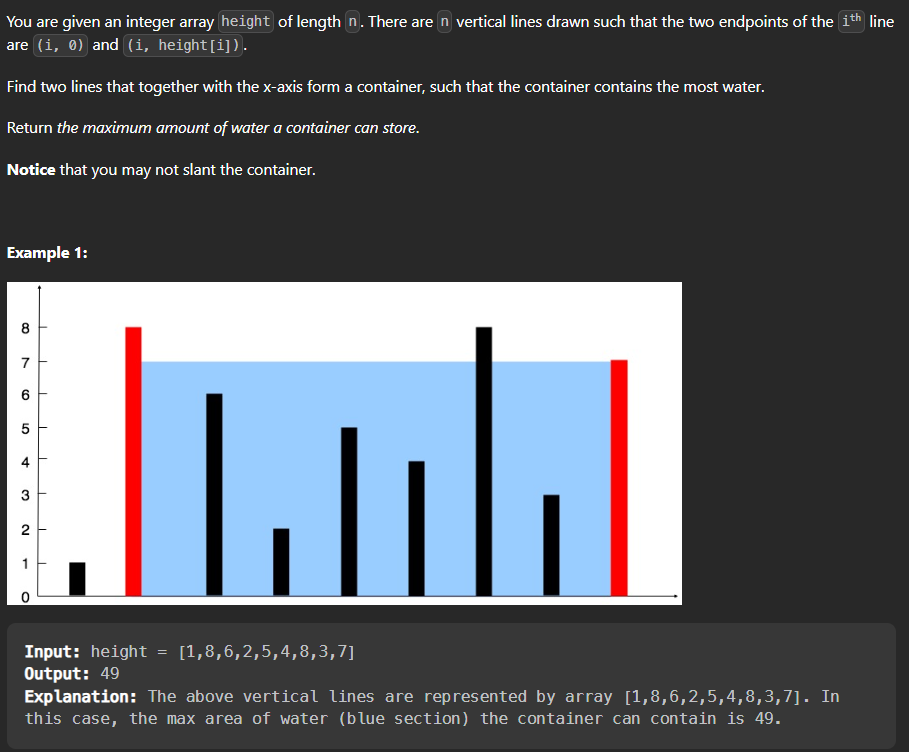
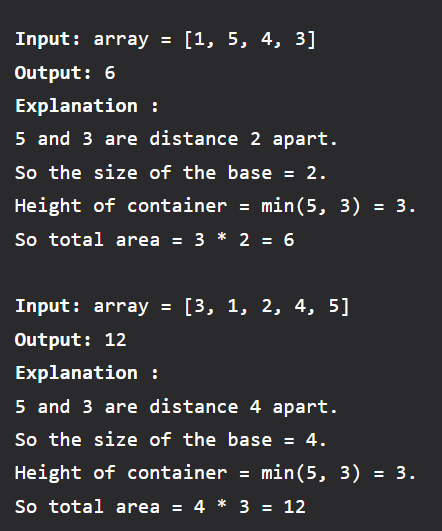

Naive approach 

- Algorithm: 
- Create a nested loop, the outer loop traverses the array from 0 to end (index of this loop is i).
- The inner loop traverses the array from i + 1 to end (index of this loop is j).
- Find the water that can be contained in the container with height of boundaries as array[i] and array[j], i.e area = (j – i)* min(array[i],array[j]), if this area is greater than current maximum, update the current maximum
- Print the current maximum.

In [81]:
a = [ 1, 5, 4, 3 ]
n = len(a)
area = 0

for i in range(0,n):
    for j in range(i+1,n):
        area = max(area,(j-i)*min(a[i] , a[j]))
    
print(area)

6


efficient solution 

- Algorithm: 
- Keep two index, first = 0 and last = n-1 and a value max_area that stores the maximum area.
- Run a loop until first is less than the last.
- Update the max_area with maximum of max_area and min(array[first] , array[last])*(last-first)
- if the value at array[first] is greater the array[last] then update last as last – 1 else update first as first + 1
- Print the maximum area.

In [82]:
def water(arr):
    n = len(arr)
    l = 0
    r = n-1 
    area = 0 
    
    while l<r :
        
        area = max(area , (min(arr[l] , arr[r]))*(r-l))
        
        if arr[l] < arr[r]:
            l += 1
        else:
            r -= 1
    return area

In [83]:
water([1, 5, 4, 3])

6

In [84]:
water([3, 1, 2, 4, 5])

12